<a href="https://colab.research.google.com/github/kirankokateGitHub/Classification2/blob/main/Kiran_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**- Bank Marketing Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Kiran

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/kirankokateGitHub/Classification2

# **Problem Statement**


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Library  for numerical python
import pandas as pd

# Import libraries for visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For doing scientific computation and necessary processing of array elements import belows.
import numpy as np
from scipy.stats import norm

# For printing tabular data
from tabulate import tabulate

# To plot feature importance import below package
from sklearn.feature_selection import mutual_info_classif

# To handle class imbalance
from imblearn.over_sampling import SMOTE

# to Split dataset into train and test datasets
from sklearn.model_selection import train_test_split

# For doing Cross-Validation and Hyperparameter Tuning import below packages
from sklearn.model_selection import GridSearchCV

# To Scale dataset
from sklearn.preprocessing import MinMaxScaler

# Import machine learninig  algorithams to build model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Import Evaluation metrics to check performance of models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# To plot Decision Tree import necessary assembalance
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Import keras to buil Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# Import shap to explain model
!pip install shap
import shap

# Import ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path= ('/content/drive/MyDrive/bank-full.csv')
# name the bank dataframe file in short as bndf
bndf = pd.read_csv(path, sep=';')

In [7]:
bndf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Dataset First View

In [8]:
# Dataset First Look
bndf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
bndf.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
bndf.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30451,30,unemployed,single,secondary,no,79,no,yes,cellular,5,feb,528,2,196,1,failure,no
15392,41,blue-collar,divorced,primary,no,138,yes,no,cellular,18,jul,640,3,-1,0,unknown,yes
11104,29,housemaid,married,secondary,no,1104,yes,no,unknown,18,jun,262,9,-1,0,unknown,no
10857,55,retired,divorced,primary,no,925,no,no,unknown,17,jun,254,1,-1,0,unknown,no
23849,42,technician,divorced,secondary,no,112,no,no,cellular,29,aug,69,4,-1,0,unknown,no


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
bndf.shape

(45211, 17)

In [12]:
bndf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Dataset Information

In [13]:
# Dataset Info
bndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
duplicate_rows = bndf.duplicated()
duplicate_rows

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [15]:
num_duplicates = duplicate_rows.sum()
num_duplicates

0

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
null= bndf.isnull().sum()
null

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
# Checking for number of null values
count_null_df = pd.DataFrame({'columns':bndf.columns,'number_of_nulls_values':bndf.isna().sum(),'percentage_null_values':round(bndf.isna().sum()*100/len(bndf),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0


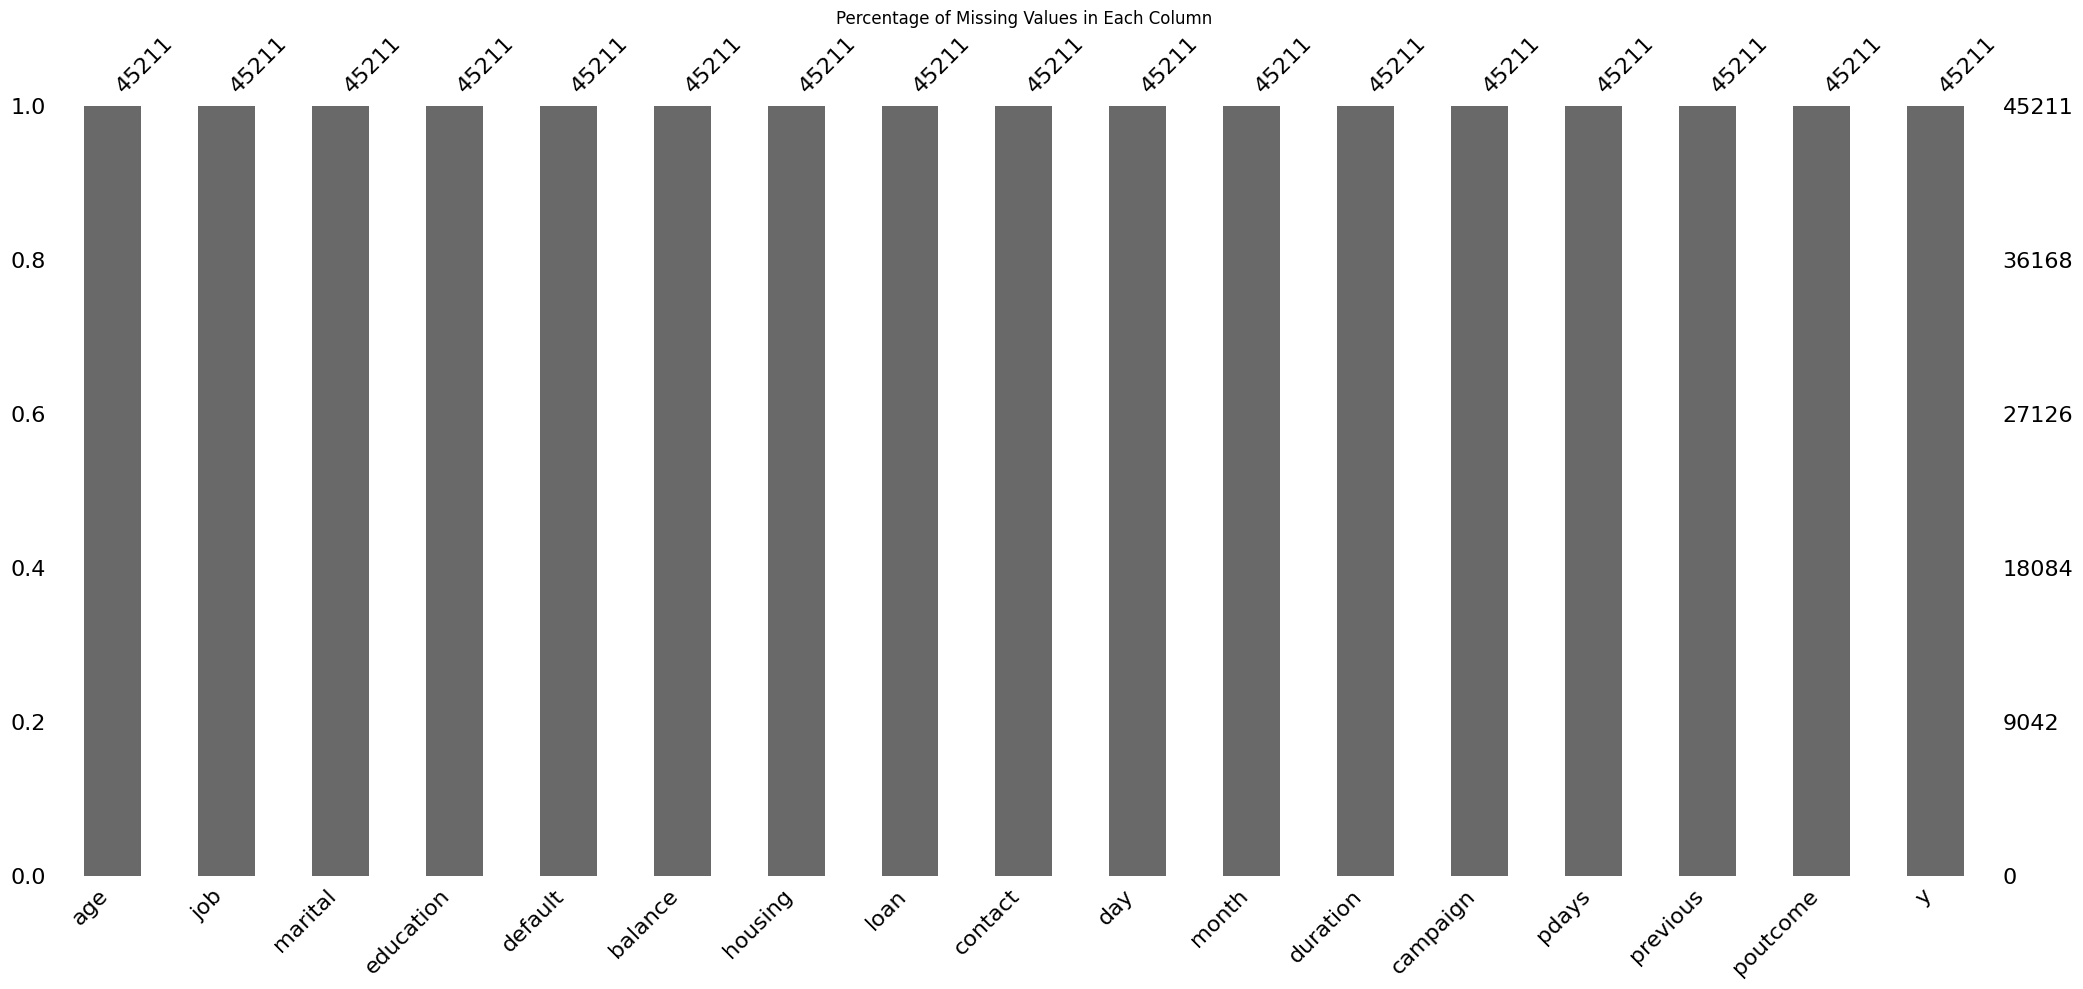

In [18]:
# Visualizing the missing values
import missingno as msno
msno.bar(bndf)
plt.title('Percentage of Missing Values in Each Column')
plt.show()

### What did you know about your dataset?

There are 45211 rows and 17 columns.

There are no null values.

There are no duplicated values.

In the dataset, there are object, float64, and int64 dtypes features present.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
bndf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
# Dataset Describe
bndf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [21]:
# Let's Find the categorical variables of the dataframe
cat_var = [var for var in bndf.columns if bndf[var].dtype=='O']
print('There are {} categorical variables present in the dataframe'.format(len(cat_var)))
print('--'*45)
print(cat_var)

There are 10 categorical variables present in the dataframe
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [22]:
# Let's Find numerical variables for the dataframe
num_var = [var for var in bndf.columns if var not in cat_var]
print('There are {} numerical variables present in our dataframrme ='.format(len(num_var)))
print('--'*45)
print(num_var)

There are 7 numerical variables present in our dataframrme =
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [23]:
# Let's Check Unique Values and their frequency for each variable
for var in bndf.columns:
    print(bndf[var].value_counts())
    print('--'*45)

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------------------------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------------------------------------------------------------------
no 

This dataset contains 10 categorical variables: job, marital, education, default, housing, loan, contact, month, poutcome, and y.

Among these variables, there are unknown values for job (288 occurrences), education (1857 occurrences), contact (13020 occurrences), and poutcome (36959 occurrences).

These unknown values are not defined and can be considered as null. As a part of data treatment, we can handle these unknown values by treating them as missing or null values and exclude them from the features used in our analysis.


Additionally, the dataset includes 7 numerical variables: age, balance, day, duration, campaign, pdays, and previous.


### Variables Description

Answer Here

age: age of client (numeric)

job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: has credit in default? (categorical: 'no','yes','unknown')

housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')

contact: contact communication type (categorical: 'cellular','telephone')

month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

balance: Account balance of client

day: last contact day of the month

duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no').

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
bndf.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.
# Let's Replace the unknown values with null across all the dataset
bndf = bndf.replace('unknown', np.nan)

In [26]:
# Let's Check number of null values present in dataframe
count_of_null_df = pd.DataFrame({'columns':bndf.columns,'number_of_nulls_values':bndf.isna().sum(),'percentage_null_values':round(bndf.isna().sum()*100/len(bndf),2)})
count_of_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
poutcome,36959,81.75
contact,13020,28.80
education,1857,4.11
job,288,0.64
month,0,0.00
previous,0,0.00
pdays,0,0.00
campaign,0,0.00
duration,0,0.00


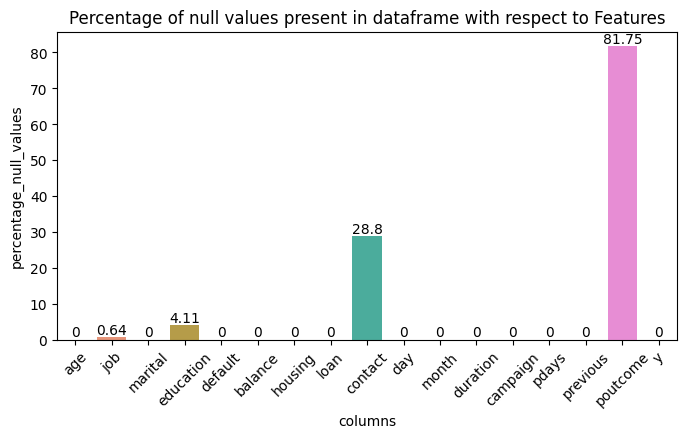

In [27]:
# Let's Plot the number of null values in dataframe with their variable
plt.figure(figsize=(8,4))
ax = sns.barplot(x='columns', y='percentage_null_values', data=count_of_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values present in dataframe with respect to Features')
plt.xticks(rotation= 45)
plt.show()

# As we can above variables namely- poutcome, contact, aducation and job has 81.75, 28.8, 4.11 ānd 0.64 percentage of null values.

Text(0.5, 1.0, 'Missing values present in the dataset with respect to its features/columns')

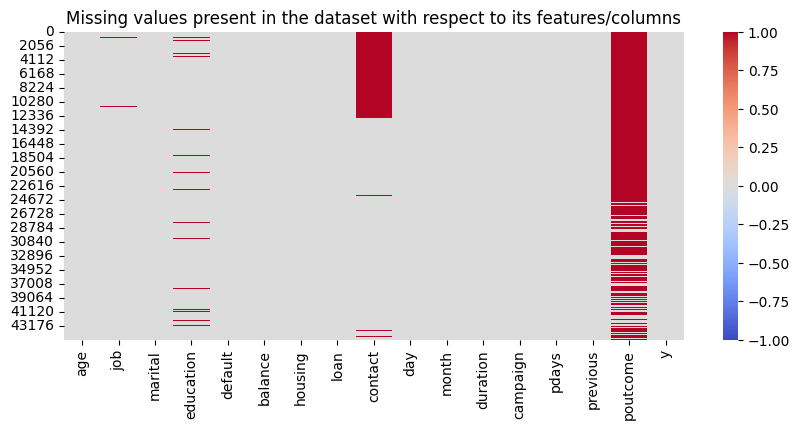

In [28]:
# Let's Vizualize the null values present in the dataset
plt.figure(figsize=(10,4))
sns.heatmap(bndf.isnull(), cbar=True, vmin=-1, cmap='coolwarm')
plt.title('Missing values present in the dataset with respect to its features/columns')

In [29]:
# let's check the category of features which is having null values.

# Let's Define the target variables
null_variables_bndf = ['poutcome','contact','education','job']
# Let's Check categories in each target feature
for var in null_variables_bndf:
    print(bndf[var].value_counts())
    print('--'*45)

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64
------------------------------------------------------------------------------------------
cellular     29285
telephone     2906
Name: contact, dtype: int64
------------------------------------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64
------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
------------------------------------------------------------------------------------------


In [30]:
# Now Drop the variables which have null values more than 50%.

bndf.drop(columns='poutcome', inplace=True)

# Let's Replace the null values with the most frequent value in a variable
bndf['contact'] = bndf['contact'].fillna(bndf['contact'].mode()[0])
bndf['education']=bndf['education'].fillna(bndf['education'].mode()[0])
bndf['job']=bndf['job'].fillna(bndf['job'].mode()[0])

In [31]:
# Let's Verify the null values are removed or not
bndf.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

Now no null values are there in datframe.

In [32]:
# Let's check shape of null free dataframe
bndf.shape

(45211, 16)

The variable 'poutput' now has been removed as it having null values more than 50 %.

**Handling Outliers**

__________________________________________________________________________________________


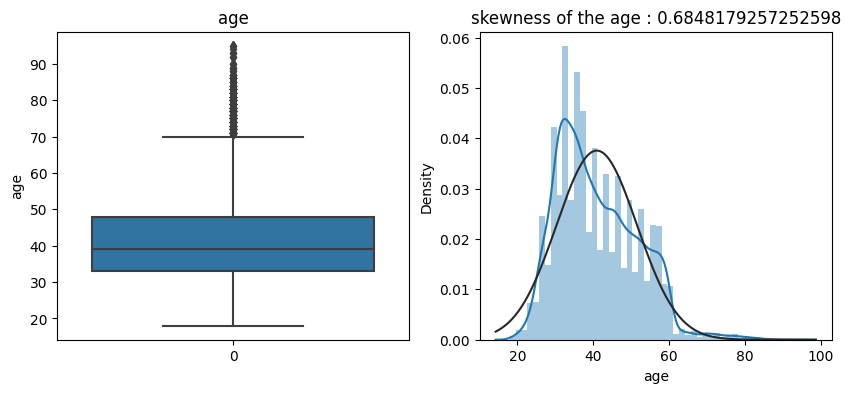

__________________________________________________________________________________________


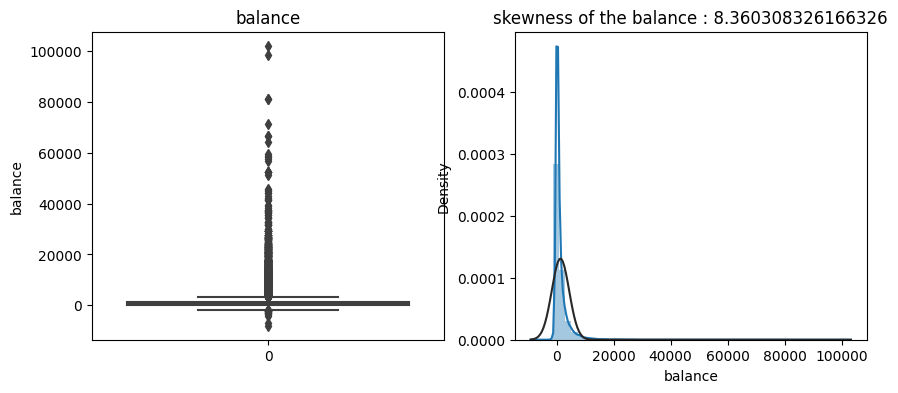

__________________________________________________________________________________________


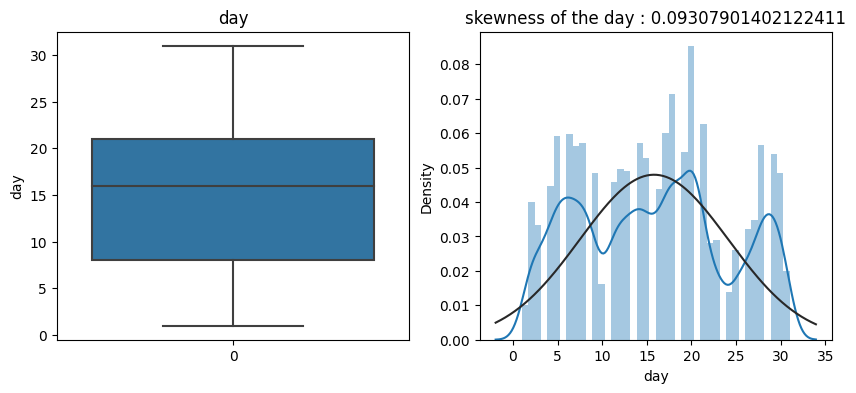

__________________________________________________________________________________________


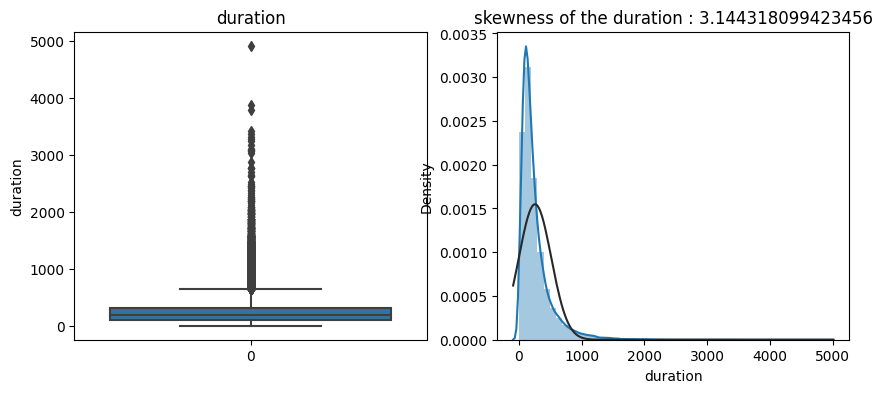

__________________________________________________________________________________________


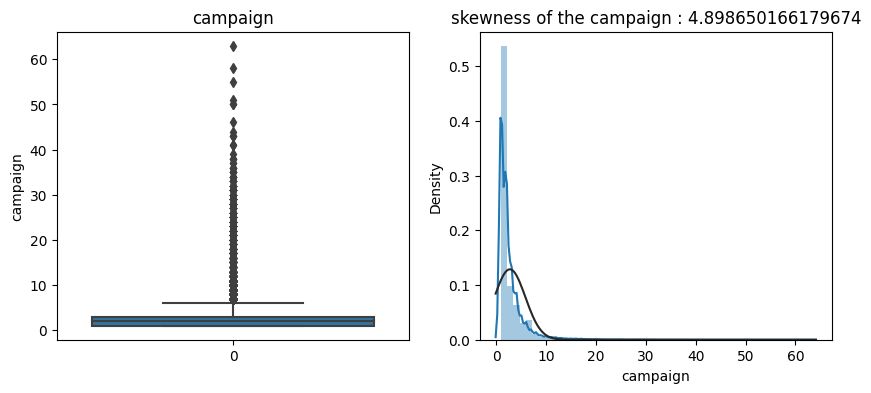

__________________________________________________________________________________________


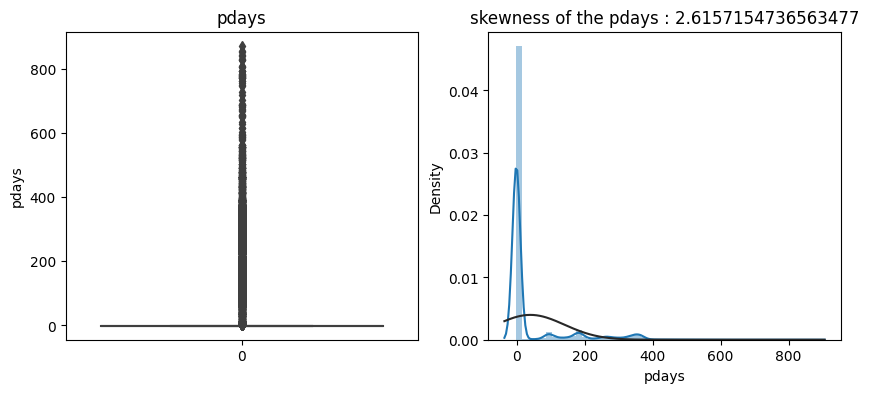

__________________________________________________________________________________________


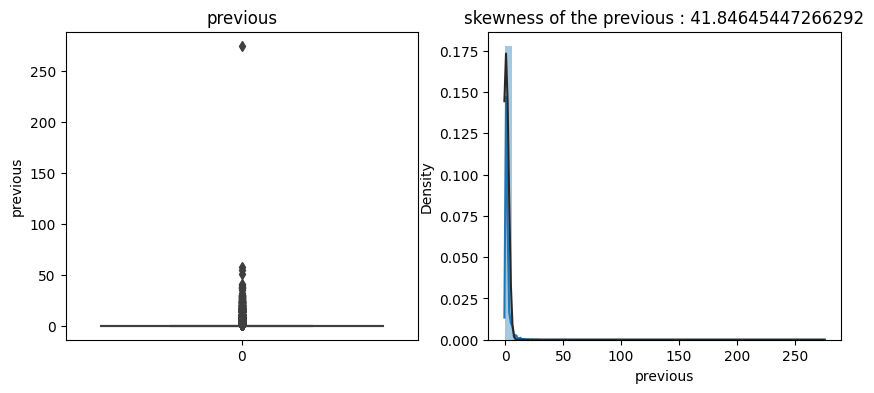

In [33]:
# Let's Check for outliers in numerical variables by use of boxplot
from scipy.stats import norm

# Let's Plot Box and Distribution plot using 'for' loop
for var in num_var:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=bndf[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(bndf[var], fit=norm)
    ax.set_title(f'skewness of the {var} : {bndf[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

The variables age, balance, duration, campaign, pdays, and previous in the dataset exhibit outliers.

Due to a flat interquartile range, it is recommended to remove the columns 'pdays' and 'previous' from consideration.

However, the variable 'day' does not contain any outliers and can be retained for further analysis.

In [34]:
# Now we will Use Inter Quartile Range to remove outliers from numerical variables

# Let's Define outliers for features but remove flat IQR for feature 'pdays' and 'previous'.
out_var = ['age', 'balance', 'duration', 'campaign']

# let's Cape dataset
for i in out_var:
    # Now  Findling for IQR
    Q1 = bndf[i].quantile(0.25)
    Q3 = bndf[i].quantile(0.75)
    IQR = Q3-Q1

    # let's Define upper and lower limits
    lower_lim = bndf[i].quantile(0.25)-1.5*IQR
    upper_lim = bndf[i].quantile(0.75)+1.5*IQR

    # Let's Apply lower and upper limit to each variable
    bndf.loc[(bndf[i] > upper_lim),i] = upper_lim
    bndf.loc[(bndf[i] < lower_lim),i] = lower_lim

__________________________________________________________________________________________


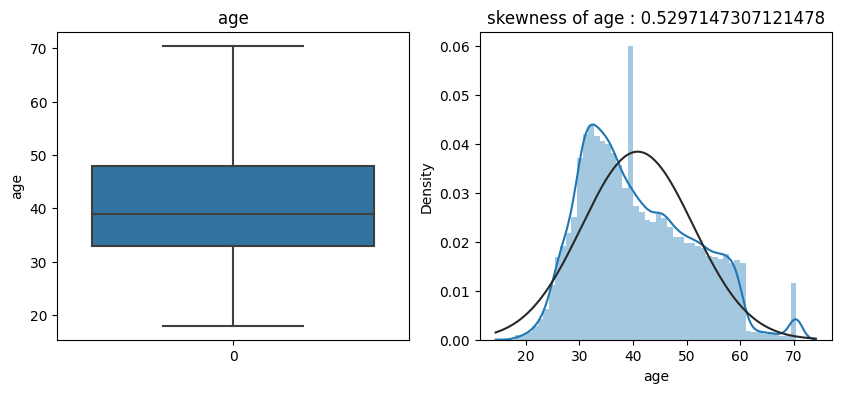

__________________________________________________________________________________________


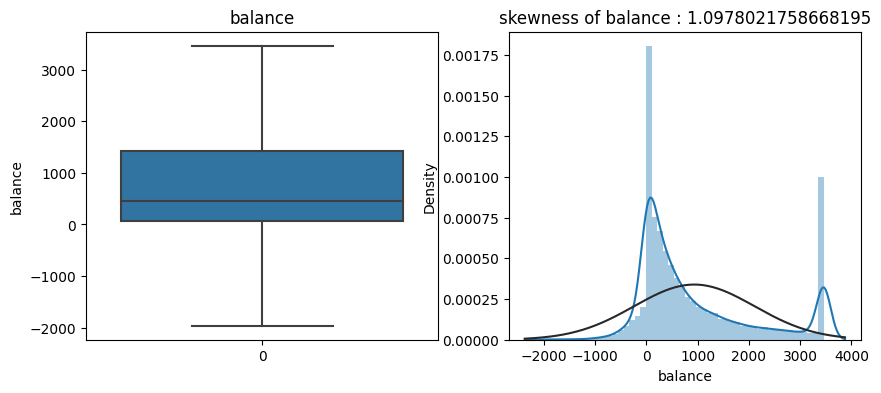

__________________________________________________________________________________________


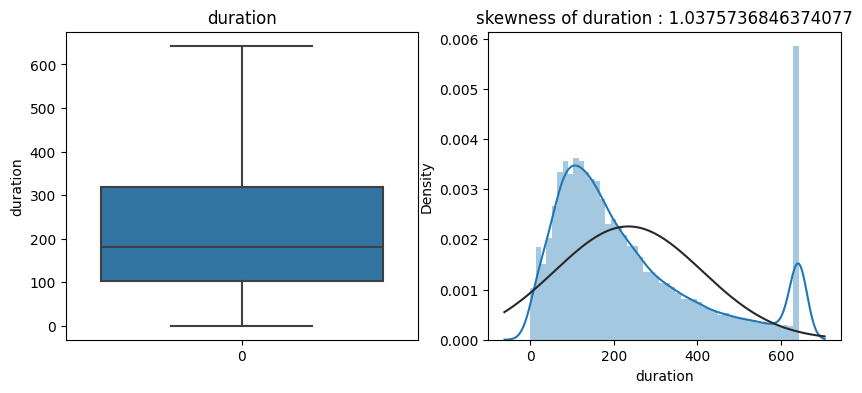

__________________________________________________________________________________________


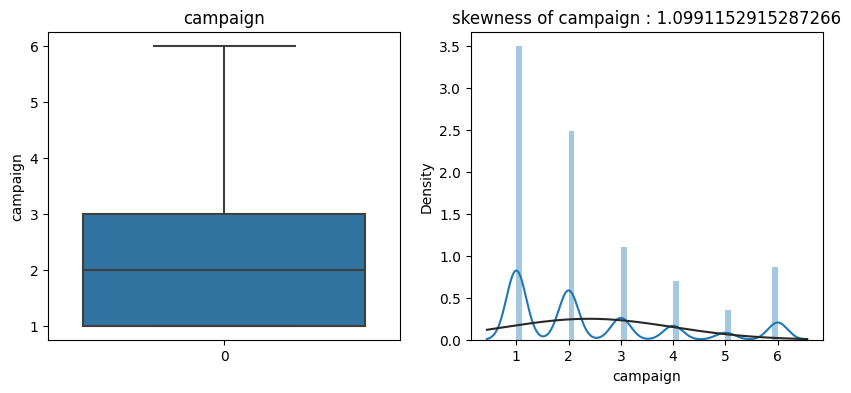

In [35]:
# By Using boxplot let's cross check outliers in features as it is removed by using IQR

for var in out_var:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=bndf[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(bndf[var], fit=norm)
    ax.set_title(f'skewness of {var} : {bndf[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

Yeah, Outliers are successfully removed from the dataset.

**Observations :**


This dataset does not contain any duplicate values.

The features job, education, contact, and poutcome have unknown values present in the dataset, with occurrences of 288, 1857, 13020, and 36959, respectively. Since these unknown values are not defined, they are considered null and can be treated accordingly by removing them from the features during data processing.

Furthermore, the features poutcome, contact, education, and job have null values, with proportions of 81.45%, 28.80%, 4.11%, and 0.64%, respectively.

To address the null values in the features contact, education, and job, we replaced them with their respective modes, which are the most frequent values.

As for features with more than 50% null values, they were eliminated from the dataset as they provided no useful information and negatively impacted model performance.

To handle outliers in the dataset, we used the interquartile range method for the variables age, balance, duration, campaign, pdays, and previous. However, due to a flat interquartile range, it was decided to remove the columns pdays and previous from consideration.

Finally, no outliers were found in the variable day.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate analysis**

In [36]:
# Defining a variaable 'q' to autofit the number and size of plots
q = int(len(bndf.columns))

In [37]:
# Define a function to Note the percent count of each value in bar form
def annote_percent(axes):
    '''Takes axes as input and labels the percent count to each bar in a countplot'''
    for w in plot.patches:
        total = sum(w.get_height() for w in plot.patches)/100
        percent = round((w.get_height()/total),2)
        x = w.get_x() + w.get_width()/2
        y = w.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

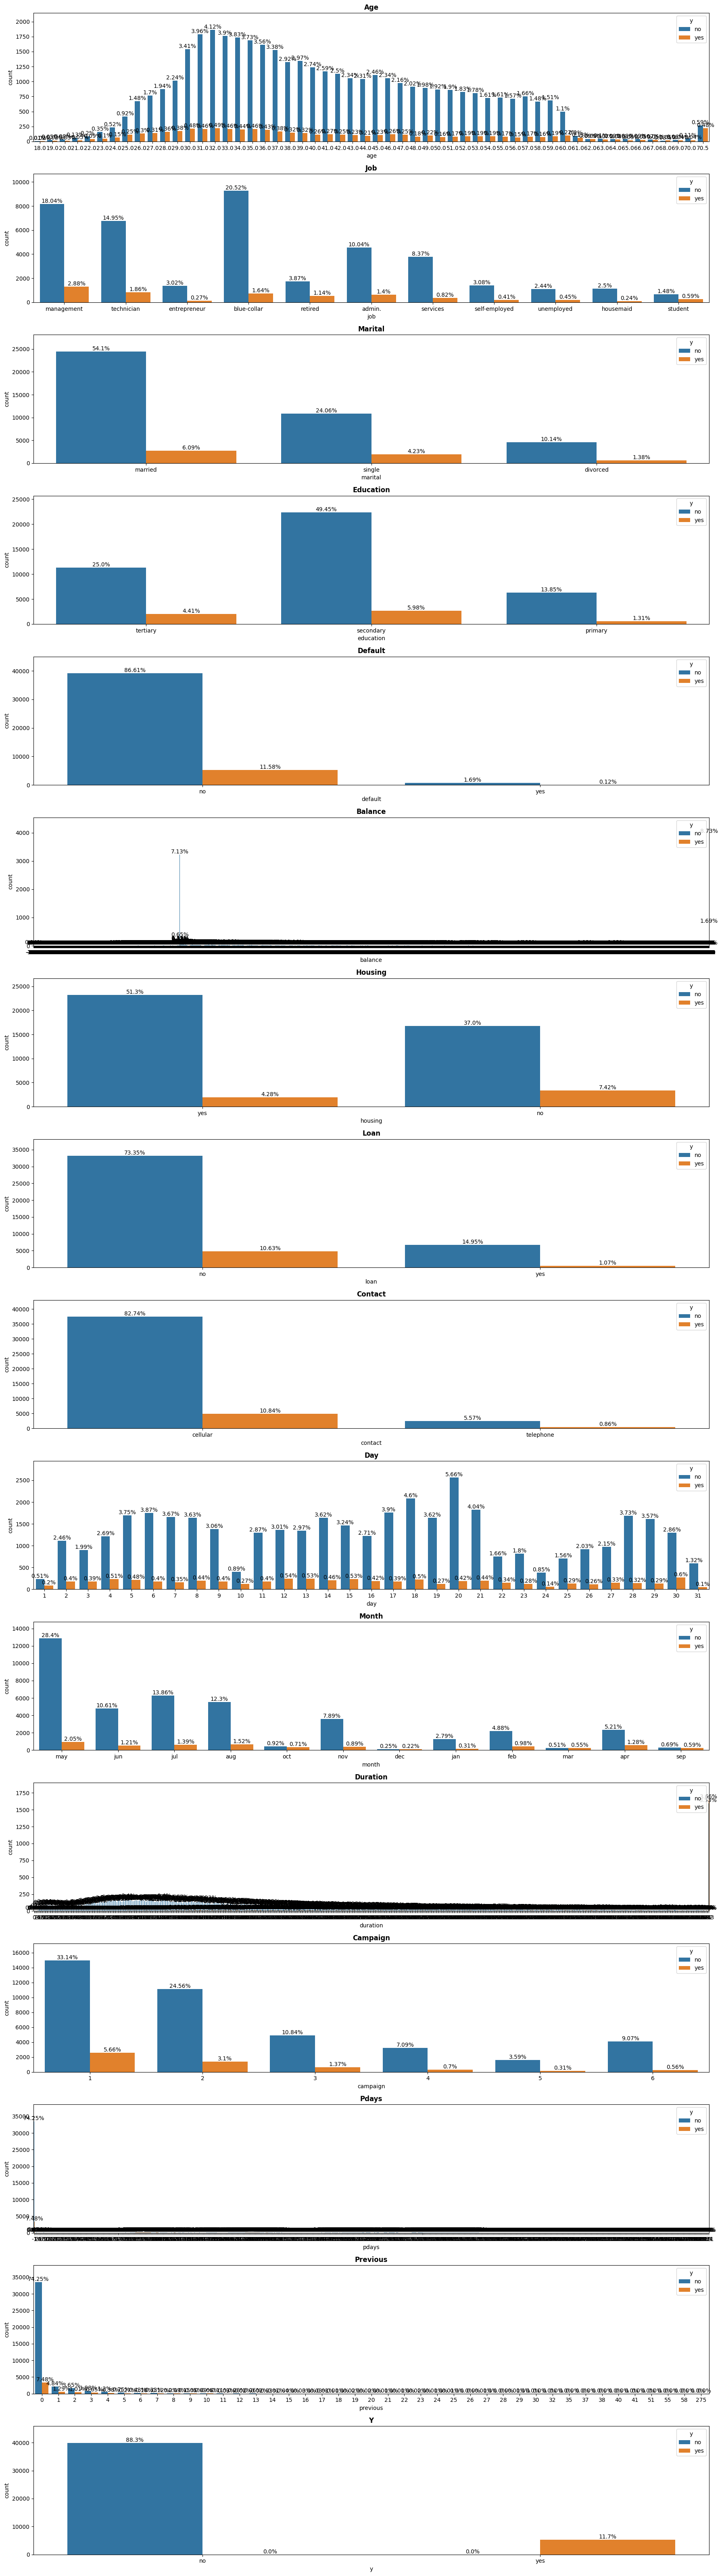

In [38]:
# Let's Plot the countplots for each variable of the target_variables
plt.figure(figsize=(18, q*4))
for m, var in enumerate(bndf.columns):
    plot = plt.subplot(q,1,m+1)
    sns.countplot(x=bndf[var], hue = bndf['y']).margins(y=0.15)
    plt.title(f'{var.title()}', weight='bold')
    plt.tight_layout()
    annote_percent(plot)

**Observations :**


The average age of clients in this dataset falls between 25 and 60 years, but the majority of bank term deposits are made by clients between the ages of 30 and 36.

Clients with blue-collar jobs are less likely to subscribe to bank term deposits (20.52%), whereas clients with managerial jobs are more likely to subscribe (2.88%).

The majority of clients are married, and interestingly, married clients are both the most likely and the least likely to subscribe to term deposits.

Clients who are more educated than primary education level are more likely to sign up for a term deposit.

Most of the clients who subscribed to term deposits have no credit in default.

Additionally, a significant number of clients who signed up for a term deposit do not have any housing loans.

Among clients with a housing loan, there is a 51% chance that they will not subscribe to a term deposit.

Furthermore, clients without any personal loans are more likely to subscribe to the term deposit.

Conversely, if a client has a personal loan, there is a higher probability that they will not subscribe to a term deposit.

Notably, the majority of clients who were contacted through cellular means have subscribed to term deposits.

The percentage of clients subscribing to term deposits on a daily basis is less than one percent.

During the months of May, June, July, August, and April, more than 1% of clients subscribed to the term deposit. However, in other months, the percentage of clients subscribing to the term deposit is less than 1%. May stands out as a particularly strong month with a subscriber rate more than double that of the other months, showing a difference of more than 2 percentage points.

It is interesting to note that no clients have signed up for a term deposit if they have received more than three phone calls. The majority of clients who signed up were contacted less than three times.

Overall, only 11.7% of the total clients in the dataset sign up for term deposits, indicating that there is an 88.3% likelihood that clients will not subscribe to term deposits.

**Bivariate Analysis**

<Axes: title={'center': 'Number of clients who has subscribed for bank term deposit as per their education and job'}, xlabel='job,education,y'>

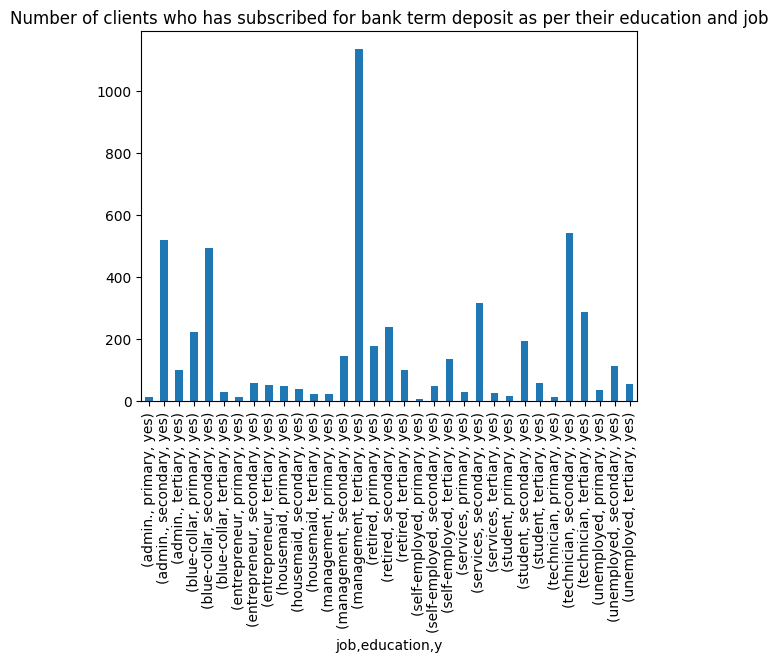

In [39]:
# Let's Plot a count plot to vizualize the number of customers according to their jobs and level of education by using group by operation

# Let's sort the  Dataset having only subscribed Bank term deposit with job and education
subscribed_bndf = bndf[bndf.y=='yes']
subscribed_bndf2=subscribed_bndf.groupby(['job','education','y'])['y'].count()

# Now Plot bar plot for subscribed Bank term deposit with job and education
subscribed_bndf2.plot(kind="bar",title = 'Number of clients who has subscribed for bank term deposit as per their education and job')


The majority of clients in management-related roles, holding a tertiary degree, opt for term deposits as their preferred investment choice.

Following closely, customers with a secondary education exhibit the second-highest likelihood of subscribing to term deposits.

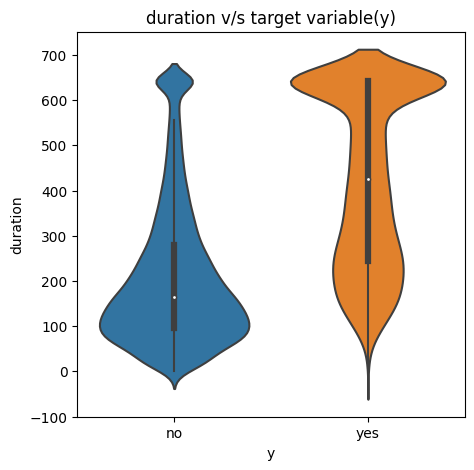

In [40]:
# Plotting box plot for Let's check the spread of duration in seconds for the target variable(yes or no) with the help of box plot
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.violinplot(x=bndf['y'], y = bndf['duration'])
ax.set_title('duration v/s target variable(y)')
annote_percent(plot)
plt.show()

Clients who spend more time on the phone are significantly more inclined to subscribe to term deposits.

On average, it takes approximately 400 seconds for clients to convey their intent to subscribe and make a term deposit.

<Axes: title={'center': 'No. of customers who subscribed bank term deposit as per their housing loan and personal loan'}, ylabel='loan,housing'>

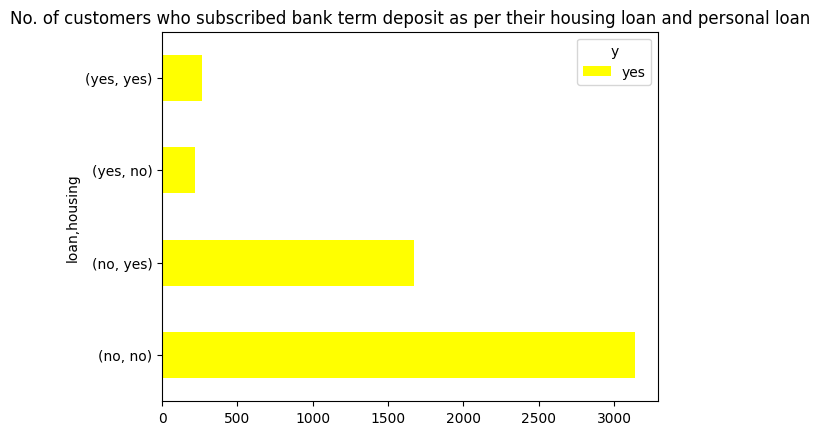

In [41]:
# Let's vizualize the count of clients who has opted for a term deposit given their housing loan and personal loan, by using bar chart.

# Sort Dataset ehich having only subscribed Bank term deposit with housing loan and personal loan
bndf_loan_yes = bndf[bndf.y=='yes']
bndf_loan_yes2= bndf_loan_yes.groupby(['loan','housing','y'])['y'].count().unstack()

# Let's see subscribed Bank term deposit with housing loan and personal loan, by plotting bar chart.

bndf_loan_yes2.plot(kind="barh",title = 'No. of customers who subscribed bank term deposit as per their housing loan and personal loan', color="yellow")


Being entirely debt-free significantly increases the likelihood of a customer signing up for a term deposit.

On the contrary, customers who already have both types of loans are less likely to choose a term deposit.

**Multivariate Analysis**

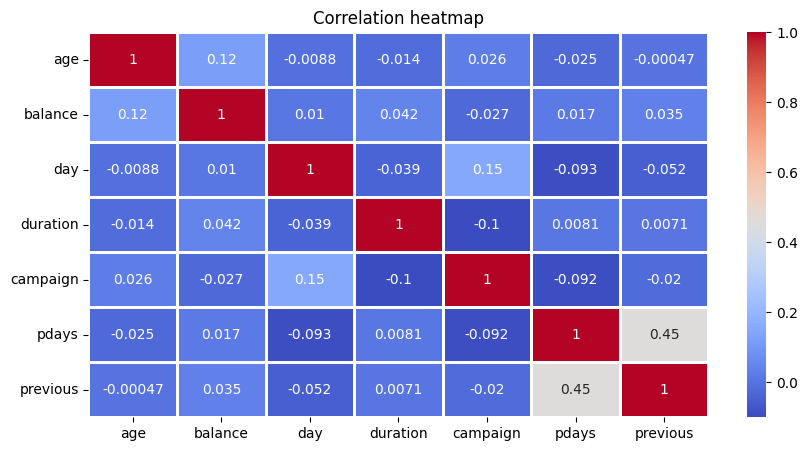

In [42]:
# Let's see the heatmap of correlation matrix to determine the relationship between the different variables
f, ax = plt.subplots(figsize = (10, 5))


# Create the heatmap of the correlation matrix of 'bndf'
sns.heatmap(bndf.corr(), ax=ax, annot=True, cmap='coolwarm', linewidths=0.75)
plt.title('Correlation heatmap')
plt.show()

There have been found no strong correlation between any independent variables.

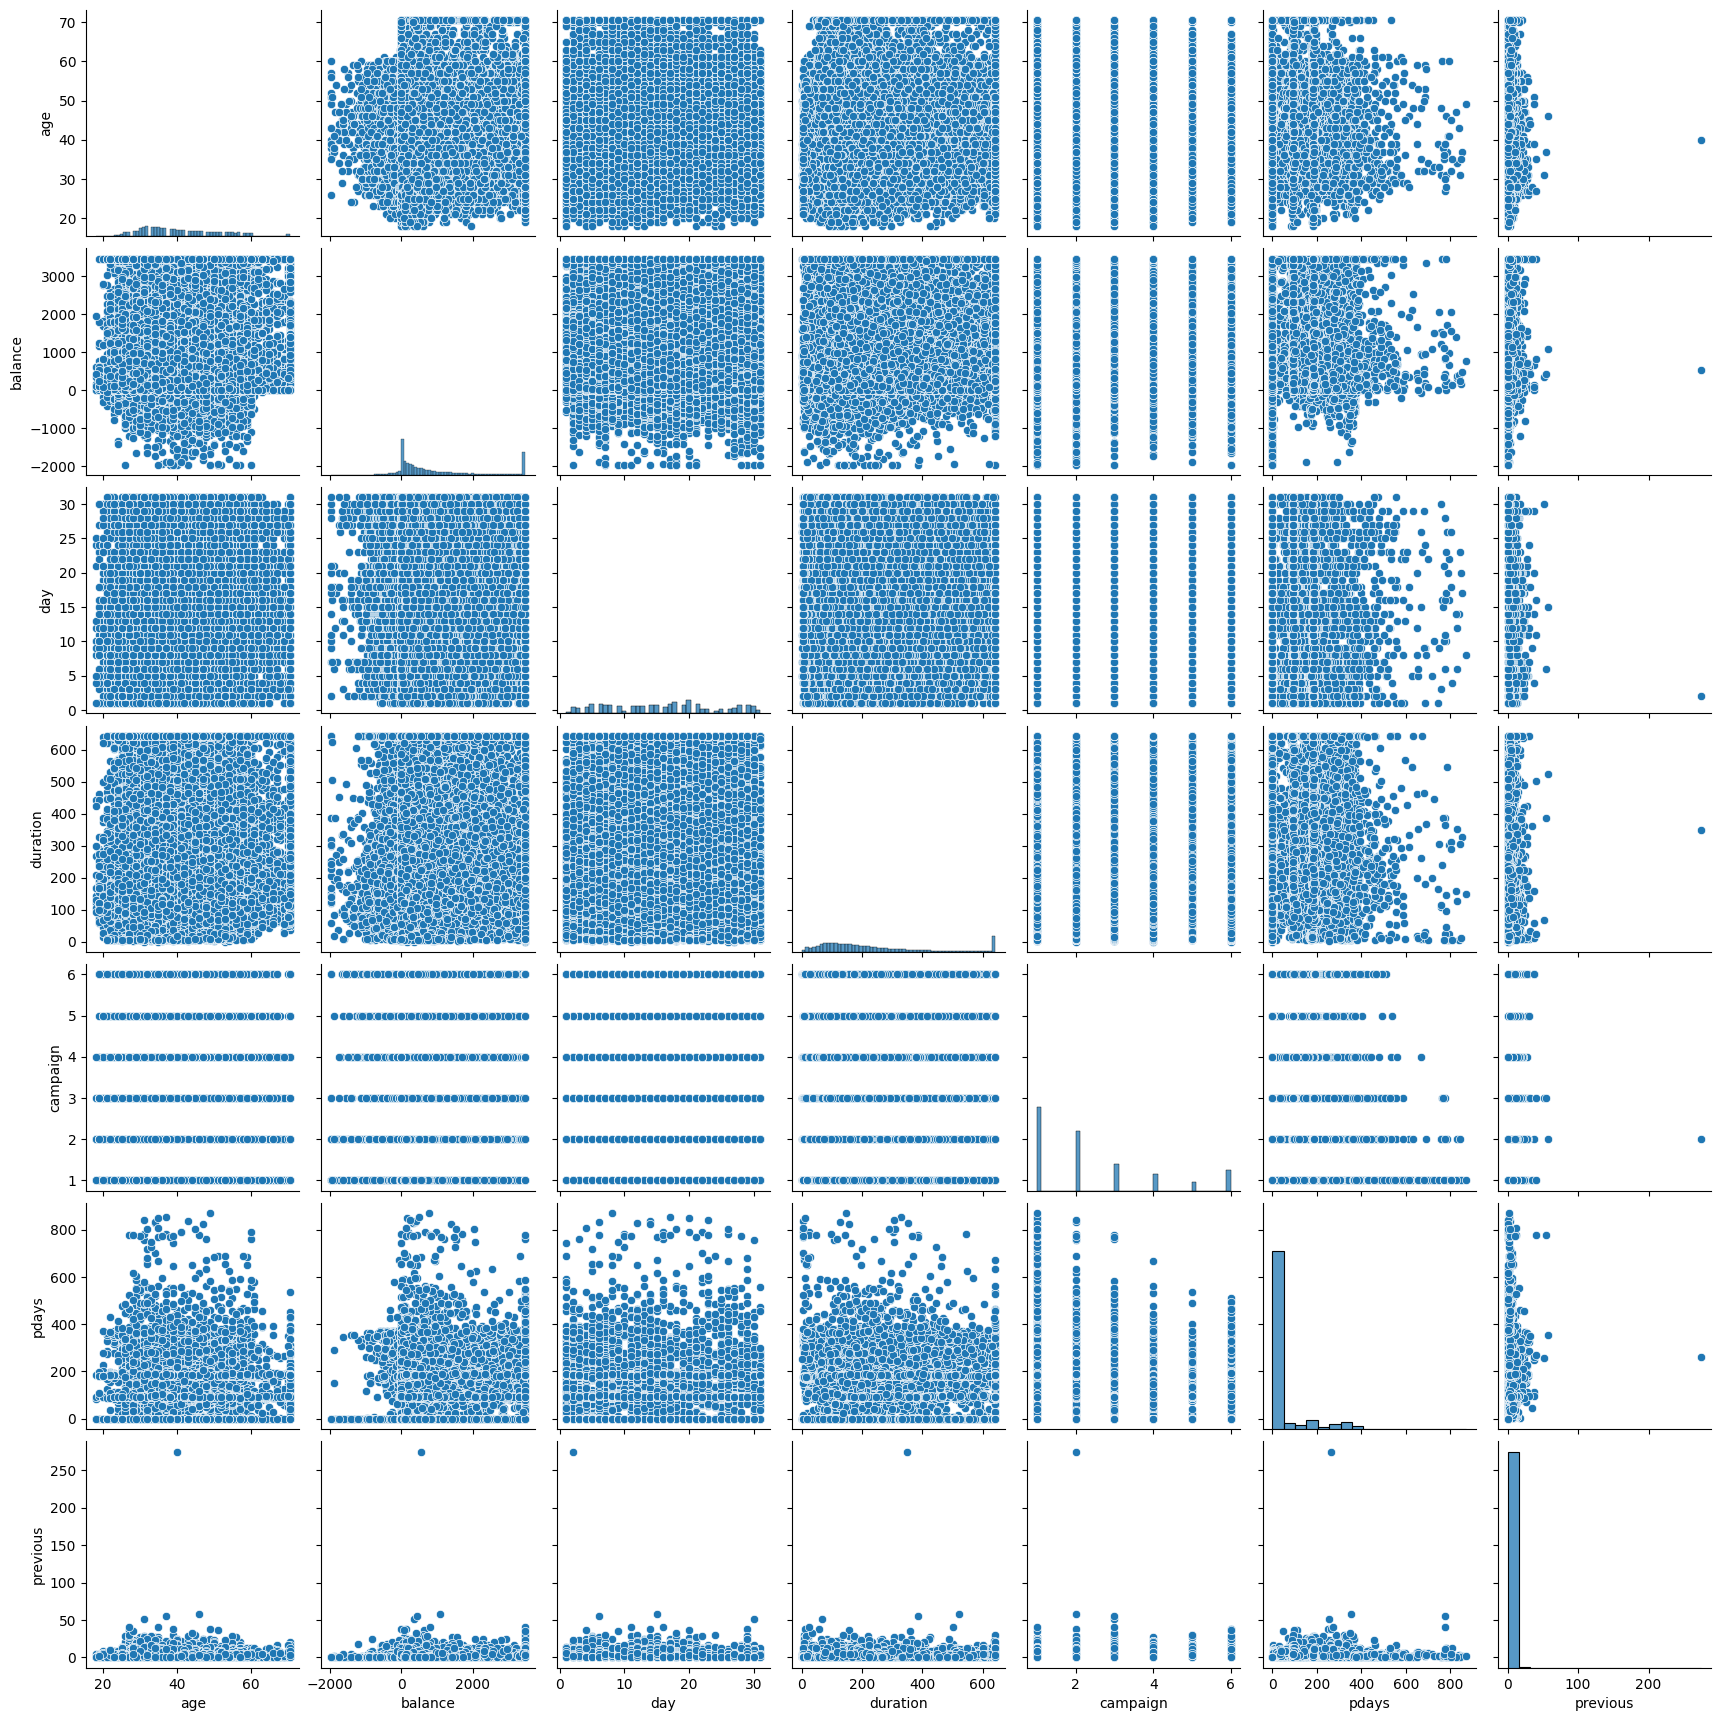

In [43]:
# Let's see the Pair Plot
sns.pairplot(bndf, palette="husl")
plt.show()

**Data Pre-processing**

 Let's do Categorical Encoding

In [44]:
# Let's Check basic info of dataset
bndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


In [45]:
# Let's Address categorical variables from the dataset
cat_variables = bndf.describe(include=['object']).columns
print(f'Categorical variables are : {list(cat_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [46]:
# Let's check value count for each category of each categorical feature
for var in cat_variables:
    print(var)
    print(bndf[var].value_counts())
    print('__'*45)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64
__________________________________________________________________________________________
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
__________________________________________________________________________________________
education
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64
__________________________________________________________________________________________
default
no     44396
yes      815
Name: default, dtype: int64
__________________________________________________________________________________________
housing
yes    25130
no     20081
Name: housing, dtype: int64
____________________________________________

For the given categorical variables (marital, education, default, housing, loan, contact, and y), label encoding is suitable due to the presence of only a few distinct categories.

However, for the categorical variables job and month, which have numerous categories, one-hot encoding should be employed to effectively represent the diverse range of options for these variables.

In [47]:
## Let's do label encoding

# Let's Map the categorical variables which have limited categories
bndf['marital'] = bndf['marital'].map({'single':0,'married':1,'divorced':2})
bndf['education'] = bndf['education'].map({'secondary':0,'tertiary':1, 'primary':2})
bndf['default'] = bndf['default'].map({'yes':1,'no':0})
bndf['housing'] = bndf['housing'].map({'yes':1,'no':0})
bndf['loan'] = bndf['loan'].map({'yes':1,'no':0})
bndf['contact'] = bndf['contact'].map({'cellular':1,'telephone':0})
bndf['y'] = bndf['y'].map({'yes':1,'no':0})

In [48]:
## Let's do One hot encoding for variable 'job' and 'month'.
bndf = pd.get_dummies(bndf, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [49]:
# Let's Check the basic information of dataset after done of above feature encoding.
bndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  int64  
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  y                  45211 non-null  int64  
 14  job_blue-collar    45211 non-null  uint8  
 15  job_entrepreneur   45211 non-null  uint8  
 16  job_housemaid      452

In [50]:
# Let's take a look at our fresh Dataset
pd.set_option('display.max_columns', None)
bndf.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,1,0,2143,1,0,1,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44.0,0,0,0,29,1,0,1,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33.0,1,0,0,2,1,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47.0,1,0,0,1506,1,0,1,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33.0,0,0,0,1,0,0,1,5,198,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Let's Separate out the Dependant(Target) and Independant variables

In [51]:

# Let's Create the dataset with all dependent variables
dependent_var = 'y'

# Let's Create the dataset with all independent variables
independent_var = list(set(bndf.columns.tolist()) - {dependent_var})

# Now Create the data of independent variables
X = bndf[independent_var].copy()
# Now Create the data of dependent variable
Y = bndf[dependent_var].copy()

Let's see for Feature Manipulation & Selection

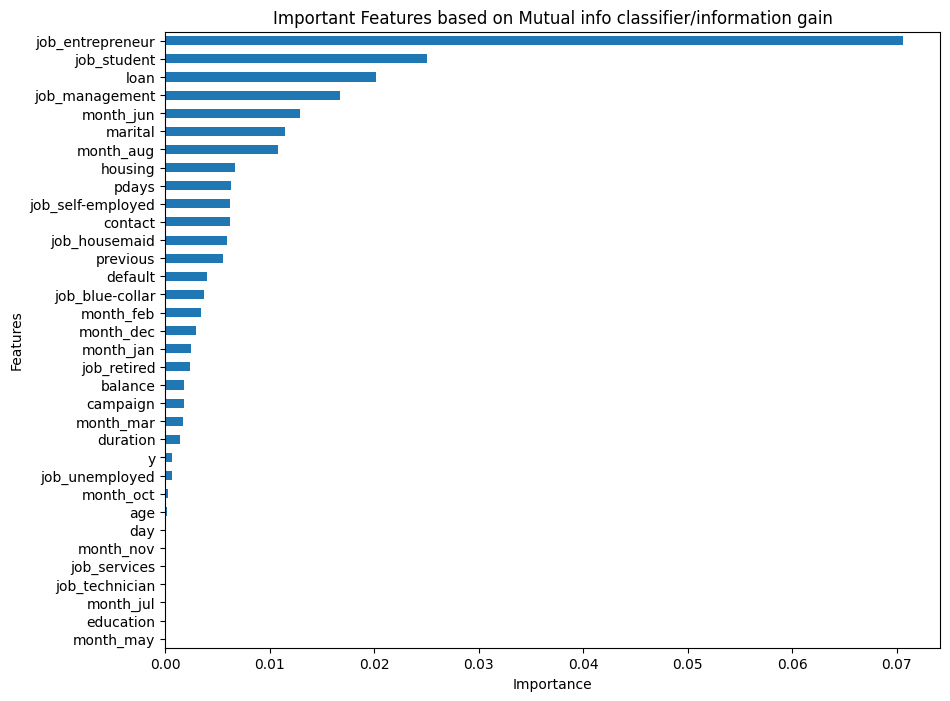

In [52]:
# Let's Plot importannt features for better selection of it to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(X,Y)
feature_imp = pd.Series(imp, bndf.columns[0:len(bndf.columns[0:34])]).sort_values(ascending=True)
plt.figure(figsize=(10,8))
feature_imp.plot(kind='barh')
plt.title("Important Features based on Mutual info classifier/information gain")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The features are ranked in descending order of importance, and if any of them were deemed unimportant, they could have been removed. However, in this case, all the included features demonstrate significant importance, so there is no need for removal, and we are keeping all of them in the analysis.

Let's Handle the Imbalanced Dataset

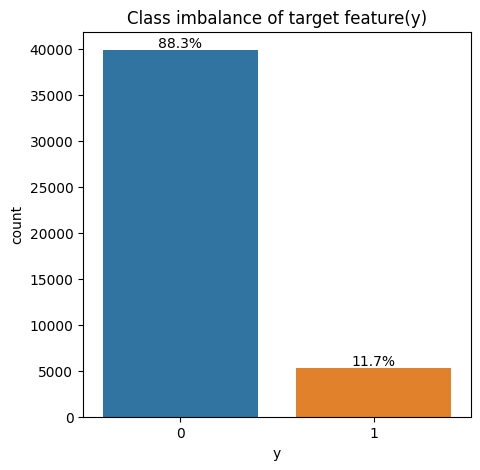

In [53]:
# Let's vizualize the class imbalance of target feature by plotting bar graph.
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=bndf['y'])
plt.title('Class imbalance of target feature(y)')
annote_percent(plot)
plt.show()

In [54]:
# Let's Import model imblearn for our envirnoment
!pip install imblearn

In [55]:
# Let's Use Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# Now fit predictor and target variable
X_smote, Y_smote = smote.fit_resample(X, Y)


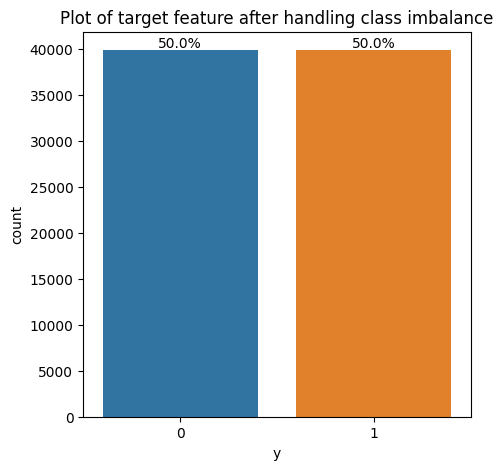

In [56]:
# Let's Plot the bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot = plt.subplot(111)
sns.countplot(x = Y_smote)
plt.title('Plot of target feature after handling class imbalance')
annote_percent(plot)
plt.show()

**Splitting of data into training and testing datasets**

In [57]:
# Splitting the dataset into two sets i.e training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

In [58]:
# Let's Check the shape of split data sets
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of Y_train : {Y_train.shape}')
print(f'Shape of Y_test : {Y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of Y_train : (63875,)
Shape of Y_test : (15969,)


In [59]:
# Let's Check values of the splitted dataset
X_train[0:3]

,default,contact,job_services,month_oct,month_dec,day,balance,month_mar,job_housemaid,month_feb,job_student,month_sep,education,job_unemployed,campaign,duration,marital,housing,job_technician,month_may,job_entrepreneur,pdays,job_self-employed,job_management,previous,month_jul,loan,job_retired,month_jun,age,job_blue-collar,month_jan,month_nov,month_aug
76180,0,1,0,0,0,10,3324,0,0,1,0,0,1,0,1,310,1,0,0,0,0,86,0,0,3,0,0,0,0,70.028256,0,0,0,0
36038,0,1,0,0,0,11,4,0,0,0,0,0,1,0,1,67,1,1,0,1,0,-1,0,0,0,0,1,1,0,50.000000,0,0,0,0
41791,0,1,0,1,0,13,0,0,0,0,0,0,1,0,3,78,1,0,0,0,0,-1,0,1,0,0,0,0,0,62.000000,0,0,0,0


In [60]:
# Let's check values of splitted test dataset
X_test[0:3]

,default,contact,job_services,month_oct,month_dec,day,balance,month_mar,job_housemaid,month_feb,job_student,month_sep,education,job_unemployed,campaign,duration,marital,housing,job_technician,month_may,job_entrepreneur,pdays,job_self-employed,job_management,previous,month_jul,loan,job_retired,month_jun,age,job_blue-collar,month_jan,month_nov,month_aug
72809,0,1,0,0,0,17,3462,0,0,0,0,0,0,0,2,315,1,0,0,0,0,-1,0,0,0,0,0,0,0,39.273337,0,0,0,0
71061,0,1,0,0,0,22,1100,0,0,0,0,0,0,0,2,643,0,1,0,0,0,-1,0,0,0,0,0,0,0,46.690791,0,0,0,0
57176,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,643,1,0,0,0,0,-1,0,0,0,0,0,0,0,54.030217,0,0,0,0


In [61]:
# Let's do data scalling

# Transforming data
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)
X_test = MinMaxScaler.transform(X_test)

By employing MinMaxScaler to scale the dataset, we ensure that the shape of the original distribution is preserved, and the fundamental information embedded in the original data remains unchanged.

This scaling technique allows us to normalize the features within a specified range, enabling more effective data processing and model training without altering the inherent information present in the dataset.

In [62]:
# Let's Check values of splitted train dataset after normalisation
X_train[0:5]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.3       , 0.97455752, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.48211509, 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.09977064, 0.        , 0.        , 0.05263158,
        0.        , 0.        , 0.        , 0.        , 0.9910144 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.36246313, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.10419907, 0.5       , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.60952381,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
  

In [63]:
# Let's Check values of splitted test dataset after normalisation
X_test[0:5]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.53333333, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.2       ,
        0.48989114, 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.40520641,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.7       , 0.56452802, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.2       ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.54649125,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  


A class imbalance is evident as we observe a significant difference between the number of clients who subscribed to term deposits (11.7%) and those who did not (88.3%). This discrepancy in class distribution raises concerns about the potential bias it may introduce in our analysis or model training, warranting appropriate measures to address the imbalance if necessary.

 **Model Implementation**

In [64]:
# Let's define a function which will fit classification algoritham, evaluate and visualise model with train test split data

# Let's Import required evaluation metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



# Let's defining the function
# class_mod= Classificatin_model
def class_mod(X_train, X_test, Y_train, Y_test, clf):
    """
    This function will- fit the ML algorithm on the training set, evaluate the model, and visualise evaluation metrics.
    """
    ## Let's fit the model on training dataset
    Model=clf.fit(X_train, Y_train)
    print(Model)
    print('**'*40)

    ## Let's make the predictions
    Y_train_pred = Model.predict(X_train)
    Y_test_pred = Model.predict(X_test)

    ## Now evaluate the model
    print('This is the training set evaluation result :\n')
    # Let's evaluate the training set using confusion matrix
    CM_train = confusion_matrix(Y_train, Y_train_pred)
    Accuracy_train = accuracy_score(Y_train, Y_train_pred)
    Precision_train = precision_score(Y_train, Y_train_pred)
    Recall_train = recall_score(Y_train, Y_train_pred)
    F1_train = f1_score(Y_train, Y_train_pred)
    Roc_auc_score_train=roc_auc_score(Y_train, Y_train_pred)
    print("Confusion Matrix: \n", CM_train)
    print("Accuracy: ", Accuracy_train)
    print("Precision: ", Precision_train)
    print("Recall: ", Recall_train)
    print("F1 Score: ", F1_train)
    print("roc_auc_score: ", Roc_auc_score_train)
    print('\n-*****************************-\n')
    print('This is the test set evaluation result :\n')
    CM_test = confusion_matrix(Y_test, Y_test_pred)
    Accuracy_test = accuracy_score(Y_test, Y_test_pred)
    Precision_test = precision_score(Y_test, Y_test_pred)
    Recall_test = recall_score(Y_test, Y_test_pred)
    F1_test = f1_score(Y_test, Y_test_pred)
    Roc_auc_score_test=roc_auc_score(Y_test, Y_test_pred)
    print("Confusion Matrix: \n", CM_test)
    print("Accuracy: ", Accuracy_test)
    print("Precision: ", Precision_test)
    print("Recall: ", Recall_test)
    print("F1 Score: ", F1_test)
    print("roc_auc_score: ", Roc_auc_score_test)
    print('**'*40)

    ## Now visualizes the evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(CM_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix of results for training dataset')
    ax1.set_ylabel('True value label')
    ax1.set_xlabel('Predicted value label')
    ax2 = sns.heatmap(CM_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix of results for test dataset')
    ax2.set_ylabel('True value label')
    ax2.set_xlabel('Predicted value label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[Accuracy_train, Precision_train, Recall_train, F1_train, Roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics result for training dataset')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[Accuracy_test, Precision_test, Recall_test, F1_test, Roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics result for test dataset')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('**'*40)

    return {'model': Model, 'y_train_pred': Y_train_pred, 'y_test_pred': Y_test_pred, 'cm_test': CM_test, 'accuracy_test': Accuracy_test,
            'precision_test': Precision_test, 'recall_test': Recall_test, 'f1_test': F1_test, 'roc_auc_score_test': Roc_auc_score_test}


In [65]:
# Let's define a function which will fit the classification algoritham using GridSearchCV, evaluate and visualise model

# Let's Import necessary dependancy parameters

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import GridSearchCV

# Now define the function as Class_CV_model for classification_CV_model
def Class_CV_model(X_train, X_test, Y_train, Y_test, Clf, Param_grid):
    """
    The function will fit the algorithm using GridSearchCV on the training set, then evaluate the model, and visualise evaluation metrics.
    """
    ## Now Fit the model for training dataset
    classifier = Clf
    Model = GridSearchCV(classifier, Param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    Model.fit(X_train, Y_train)
    print(Model)
    print('**'*40)

    # Now Print the best parameters and score
    print("Best parameters:", Model.best_params_)
    print("Best score:", Model.best_score_)
    print('**'*40)

    ## Now Make the predictions
    Y_train_pred = Model.predict(X_train)
    Y_test_pred = Model.predict(X_test)

    ## Let's go Evaluate the model
    print('Training set evaluation result are as folllows :\n')
    CM_train = confusion_matrix(Y_train, Y_train_pred)
    Accuracy_train = accuracy_score(Y_train, Y_train_pred)
    Precision_train = precision_score(Y_train, Y_train_pred)
    Recall_train = recall_score(Y_train, Y_train_pred)
    F1_train = f1_score(Y_train, Y_train_pred)
    Roc_auc_score_train = roc_auc_score(Y_train, Y_train_pred)
    print("Confusion Matrix: \n", CM_train)
    print("Accuracy: ", Accuracy_train)
    print("Precision: ", Precision_train)
    print("Recall: ", Recall_train)
    print("F1 Score: ", F1_train)
    print("roc_auc_score: ", Roc_auc_score_train)
    print('\n-**********************************-\n')
    print('Test set evaluation result are as follows :\n')
    CM_test = confusion_matrix(Y_test, Y_test_pred)
    Accuracy_test = accuracy_score(Y_test, Y_test_pred)
    Precision_test = precision_score(Y_test, Y_test_pred)
    Recall_test = recall_score(Y_test, Y_test_pred)
    F1_test = f1_score(Y_test, Y_test_pred)
    Roc_auc_score_test = roc_auc_score(Y_test, Y_test_pred)
    print("Confusion Matrix: \n", CM_test)
    print("Accuracy: ", Accuracy_test)
    print("Precision: ", Precision_test)
    print("Recall: ", Recall_test)
    print("F1 Score: ", F1_test)
    print("roc_auc_score: ", Roc_auc_score_test)
    print('**'*40)

    ## Now Visualizes the evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(CM_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set is as follows')
    ax1.set_ylabel('True value label')
    ax1.set_xlabel('Predicted value label')
    ax2 = sns.heatmap(CM_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set is as follows')
    ax2.set_ylabel('True value label')
    ax2.set_xlabel('Predicted value label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[Accuracy_train, Precision_train, Recall_train, F1_train, Roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set is as follows')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[Accuracy_test, Precision_test, Recall_test, F1_test, Roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set is as follows')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('**'*40)

    return {'model': Model, 'y_train_pred': Y_train_pred, 'y_test_pred': Y_test_pred, 'cm_test': CM_test, 'accuracy_test': Accuracy_test,
            'precision_test': Precision_test, 'recall_test': Recall_test, 'f1_test': F1_test, 'roc_auc_score_test': Roc_auc_score_test}


In [66]:
# Now Define the function to plot ROC curve
def Plot_roc_curve(Y_test, Y_pred):
    """
    Let's plots the roc curve
    """
    # Now generate a list of false and true positive rates
    Fpr, Tpr, Thresholds = roc_curve(Y_test, Y_pred)
    # Now calculate the area under the curve (AUC)
    Roc_auc = auc(Fpr, Tpr)
    # Now plotting the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(Fpr, Tpr, label='See the ROC curve (AUC = %0.4f)' % Roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labels to the graph
    plt.xlabel('False +ve Rate (Precision)')
    plt.ylabel('True +ve Rate (Recall)')
    plt.title('This is Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

**[1] Logistic Regression- Implementation**

LogisticRegression(max_iter=10000, random_state=0)
********************************************************************************
This is the training set evaluation result :

Confusion Matrix: 
 [[29525  2489]
 [ 2970 28891]]
Accuracy:  0.9145362035225049
Precision:  0.9206819630337795
Recall:  0.9067825868616805
F1 Score:  0.913679416834016
roc_auc_score:  0.9145176756386243

-*****************************-

This is the test set evaluation result :

Confusion Matrix: 
 [[7257  651]
 [ 765 7296]]
Accuracy:  0.9113281983843697
Precision:  0.918082295205738
Recall:  0.9050986229996278
F1 Score:  0.911544227886057
roc_auc_score:  0.9113884617274316
********************************************************************************


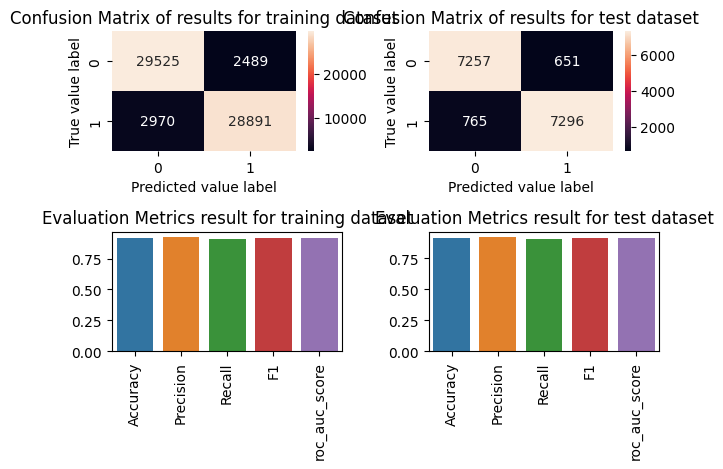

********************************************************************************


In [67]:
# Let's import Logistic Regression algoritham
from sklearn.linear_model import LogisticRegression
# NowfFit the Logistic Regression model on training dataset
Logistic_reg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)
LR = class_mod(X_train, X_test, Y_train, Y_test, Logistic_reg)

**Conclusions about Lostistic regression:**

The logistic regression model appears to have good performance on both the training and test sets.

The evaluation metrics indicate that it can effectively classify instances with a high level of accuracy, precision, recall, and F1 score. The ROC AUC score also suggests that the model has good discrimination ability.

In [68]:
# Let's plot the roc curve for Logistic Regression classifier
Y_pred=LR['Y_test_pred']
Plot_roc_curve(Y_test, Y_pred)

KeyError: ignored

**Cross- Validation & Hyperparameter Tuning**

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
********************************************************************************
Best parameters: {'C': 1}
Best score: 0.9144892754746373
********************************************************************************
Training set evaluation result are as folllows :

Confusion Matrix: 
 [[29525  2489]
 [ 2970 28891]]
Accuracy:  0.9145362035225049
Precision:  0.9206819630337795
Recall:  0.9067825868616805
F1 Score:  0.913679416834016
roc_auc_score:  0.9145176756386243

-**********************************-

Test set evaluation result are as follows :

Confusion Matrix: 
 [[7257  651]
 [ 765 7296]]
Accuracy:  0.9113281983843697
Precision:  0.918082295205738
Recall:  0.9050986229996278
F1 Score:  0.911544227886057
roc_auc_score:

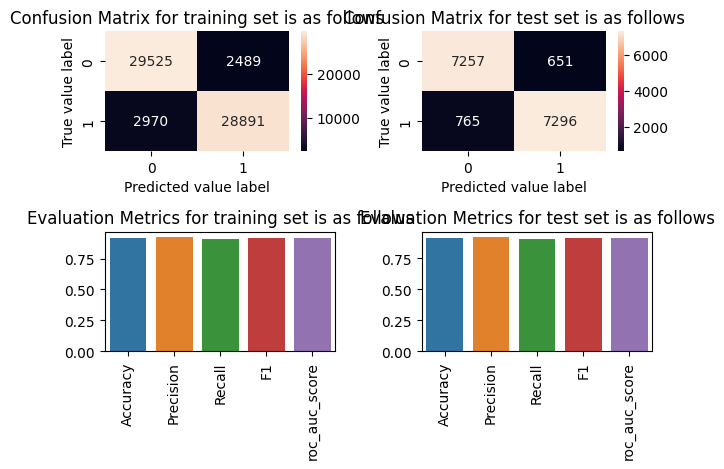

********************************************************************************


In [69]:
## Let's import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression

## Let's Fit Logistic Regression model to training set using cross validation

# Let's Define Param_dict
Param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Let's create a instance of Logistic Regression classifier
Logistic_reg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)
# Let's Fit the model
LR_cv = Class_CV_model(X_train, X_test, Y_train, Y_test, Logistic_reg, Param_grid)

The model appears to be performing well and generalizes well to new data. The evaluation metrics on the training and test sets are consistent and show good accuracy, precision, recall, F1 score, and ROC AUC score.

The cross-validation process helps to confirm that the model's performance is reliable and not overfitting to the training data.

Therefore, based on these results, we can have confidence in using the trained logistic regression model with 'C=1' for future predictions on new data.

********************************************************************************
+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.911328 |           0.911328 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.918082 |           0.918082 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.905099 |           0.905099 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.911544 |           0.911544 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.911388 |           0.911388 |
+----+----------------------+--------------------+-----

<Figure size 800x600 with 0 Axes>

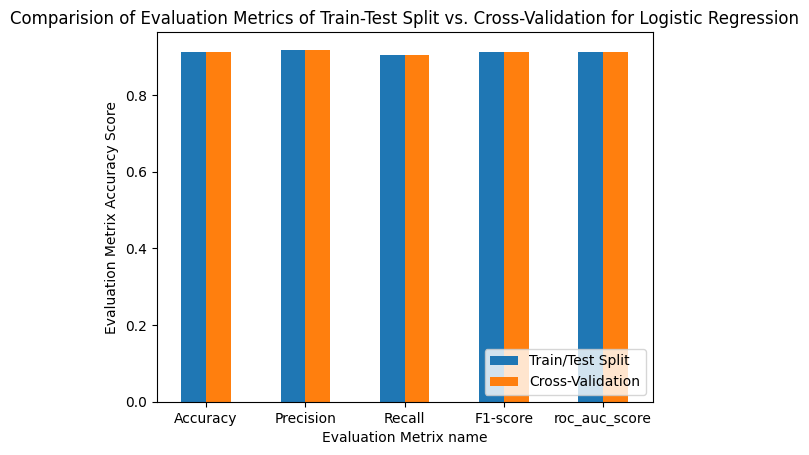

********************************************************************************


In [70]:
# Now Compare evaluation metrics of train_test_split and GridSearchCV of Logistic Regression model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [LR['accuracy_test'],LR['precision_test'],LR['recall_test'],LR['f1_test'],LR['roc_auc_score_test']]
cross_validation = [LR_cv['accuracy_test'],LR_cv['precision_test'],LR_cv['recall_test'],LR_cv['f1_test'],LR_cv['roc_auc_score_test']]

# nOW Create a dataframe
LR_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# LET'S Print dataframe
print('**'*40)
print(tabulate(LR_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '**'*40, '\n')

# Now Create a barplot
plt.figure(figsize=(8,6))
ax=LR_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Let's Set the title and labels
ax.set_title("Comparision of Evaluation Metrics of Train-Test Split vs. Cross-Validation for Logistic Regression")
ax.set_xlabel("Evaluation Metrix name")
ax.set_ylabel("Evaluation Metrix Accuracy Score")
ax.legend(loc="lower right")

# Let's Show the plot
plt.show()
print('**'*40)

The logistic regression model demonstrates consistent and promising performance across both the Train/Test Split and Cross-Validation.

 It achieves an accuracy of approximately 91.13%, precision of around 91.81%, recall of 90.51%, F1 score of about 91.15%, and ROC AUC score of approximately 91.14%.

 These results indicate that the model effectively predicts class labels, is well-balanced in handling positive instances, and has good discrimination ability.

 The model's stability and generalization to new data will make it a reliable choice for future predictions and decision-making tasks.



**[2] Random Forest**

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
********************************************************************************
This is the training set evaluation result :

Confusion Matrix: 
 [[28475  3539]
 [ 4562 27299]]
Accuracy:  0.873174168297456
Precision:  0.8852389908554381
Recall:  0.8568155425127899
F1 Score:  0.8707953874862437
roc_auc_score:  0.8731350780596685

-*****************************-

This is the test set evaluation result :

Confusion Matrix: 
 [[7003  905]
 [1184 6877]]
Accuracy:  0.8691840440854155
Precision:  0.8837059881778463
Recall:  0.853119960302692
F1 Score:  0.8681436596604178
roc_auc_score:  0.869339443985438
********************************************************************************


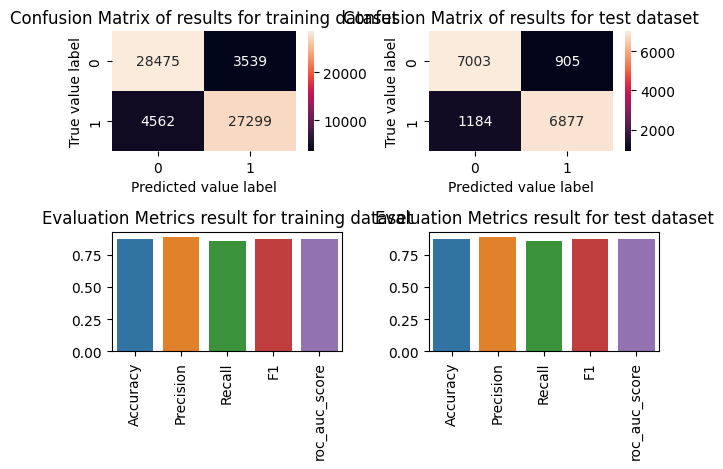

********************************************************************************


In [75]:
# Let's import Random Forest algoritham
from sklearn.ensemble import RandomForestClassifier
# Let's fit the Random Forest model to training dataset
Classifier_RF = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
RF = class_mod(X_train, X_test, Y_train, Y_test, Classifier_RF)

The RandomForestClassifier achieves an accuracy of approximately 87.32% on the training set and 86.92% on the test set.

It demonstrates consistent precision of around 88.52% and 88.37% on the training and test sets, respectively.

The recall values are approximately 85.68% and 85.31% on the training and test sets, respectively. The F1 scores are around 87.08% on the training set and 86.81% on the test set.

However, the model's ROC AUC scores of approximately 87.31% and 86.93% suggest that it may have room for improvement in distinguishing between positive and negative instances.

Further fine-tuning or exploring different models could potentially enhance its performance.


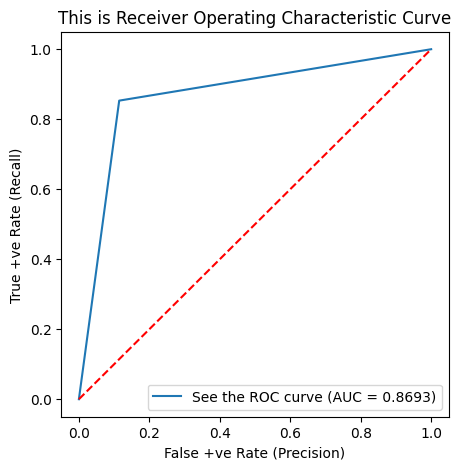

In [77]:
# Plot ROC curve for Random Forest classifier
Y_pred = RF['y_test_pred']
Plot_roc_curve(Y_test, Y_pred)

As the ROC curve's AUC (Area Under the Curve) is approximately 0.8693, it indicates that the RandomForestClassifier has a fair ability to distinguish between positive and negative instances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***